In [1]:
#imports

from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib widget

### Ejercicio 1:
Obtener los siguientes valores de una señal senoidal, una rampa, una onda cuadrada y una señal aleatoria:
1. valor medio: suma de las componentes entre la cantidad de muestras,
2. máximo,
3. mínimo,
4. amplitud,
5. energía: norma 2 al cuadrado, da una idea del tamaño físico de la señal,
6. acción: norma 1 de la señal,
7. potencia media: energía dividido cantidad de muestras,
8. raíz del valor cuadrático medio: raíz de la potencia.

#### NORMA DE UNA SEÑAL
medida del tamaño de las señales. La norma de un vector es un número real positivo que toma el valor 0 solo cuando el vactor es 0. Una norma muy utilizada es la norma-p:

$$ ||x||_p = (\sum_{n = 1}^{N} |x_n|^p)^\frac{1}{p} \text , 1 \leq p < \infty  $$

Y la norma infinito se define como:

$$ ||x||_\infty = sup_{n \in [1, N]} |x_n|








In [2]:
def senoidal(fm, fs, phi, tini, tfin, A): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = A * np.sin(2*math.pi*fs*t + phi) 
    return x, t

def cuadrada(fm, fs, phi, tini, tfin):
  Tm = 1/fm
  t = np.arange(tini, tfin, Tm)  
  cond = np.mod(2*math.pi*fs*t+phi, 2*math.pi)
  idx_noceros = np.where(cond>= math.pi)
  y = np.ones(len(t))
  y[idx_noceros] = -1
  return t, y

def aleatoria(mu,sigma,fm, tini, tfin):
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    return t, np.random.normal(mu, sigma, len(t))

def rampa(fm, tini, tfin):
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.zeros(len(t))
    x[t>-0.0001] = t[t>-0.0001]
    return t,x

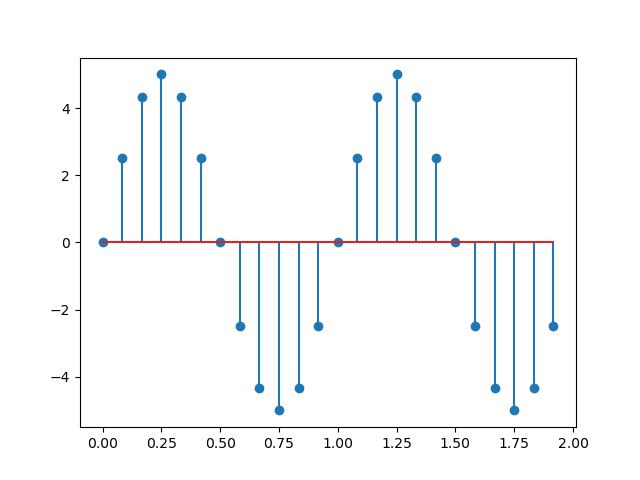

Medio: 1.5055529325505337e-16
Máximo: 5.0
Mínimo: -5.0
Amplitud: 5.0
Acción: 74.64101615137756
Energía: 300.00000000000006
Potencia media (valor cuadrático medio): 12.500000000000002
Raíz del valor cuadrático medio 3.5355339059327378


In [3]:
# SENOIDAL

x, t = senoidal(12, 1, 0, 0, 2, 5)
plt.close('all')
plt.figure()
plt.stem(t,x)
plt.show()

print('Medio:', np.mean(x))
print('Máximo:', np.max(x))
print('Mínimo:',np.min(x))
print('Amplitud:', np.max(np.abs(x)))
print('Acción:', np.linalg.norm(x, 1))
energia = np.power(np.linalg.norm(x, 2),2)
print('Energía:', energia)
potencia = energia/len(x)
print('Potencia media (valor cuadrático medio):', potencia)
print('Raíz del valor cuadrático medio', np.sqrt(potencia))

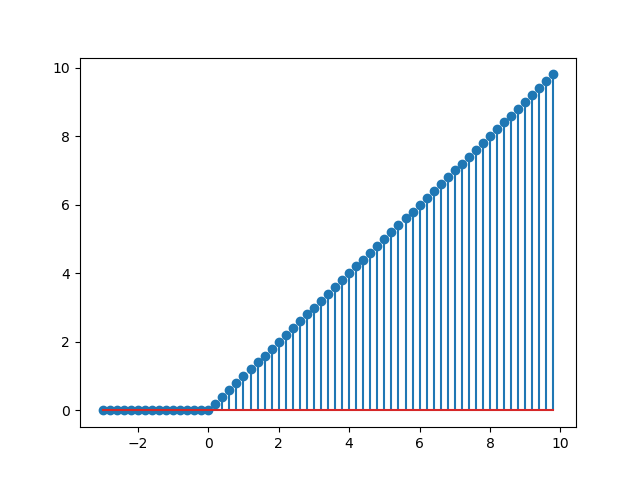

Medio: 3.7692307692307745
Máximo: 9.800000000000011
Mínimo: 0.0
Amplitud: no se
Acción: 245.00000000000034
Energía: 1617.0000000000039
Potencia media (valor cuadrático medio): 24.876923076923138
Raíz del valor cuadrático medio 4.987677122360983


In [4]:
# RAMPA
t, x = rampa(5,-3, 10)
plt.figure()
plt.stem(t,x)
plt.show()

print('Medio:', np.mean(x))
print('Máximo:', np.max(x))
print('Mínimo:',np.min(x))
print('Amplitud: no se')
print('Acción:', np.linalg.norm(x, 1))
energia = np.power(np.linalg.norm(x, 2),2)
print('Energía:', energia)
potencia = energia/len(x)
print('Potencia media (valor cuadrático medio):', potencia)
print('Raíz del valor cuadrático medio', np.sqrt(potencia))

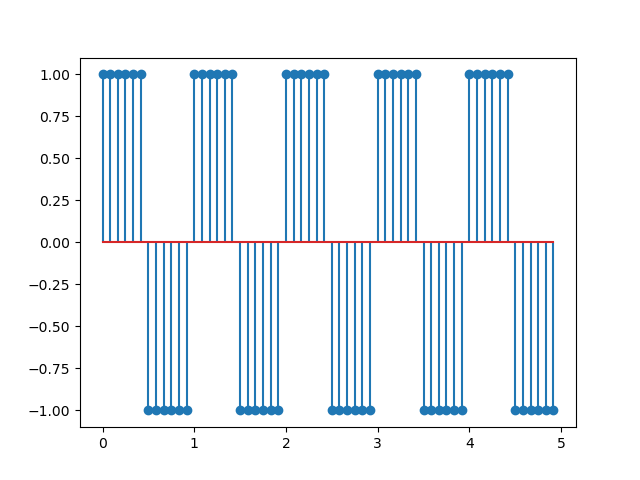

Medio: 0.0
Máximo: 1.0
Mínimo: -1.0
Amplitud: no se
Acción: 60.0
Energía: 60.00000000000001
Potencia media (valor cuadrático medio): 1.0000000000000002
Raíz del valor cuadrático medio 1.0


In [5]:
# CUADRADA

t, x = cuadrada(12, 1, 1/2, 0, 5)
plt.close('all')
plt.figure()
plt.stem(t,x)
plt.show()

print('Medio:', np.mean(x))
print('Máximo:', np.max(x))
print('Mínimo:',np.min(x))
print('Amplitud: no se')
print('Acción:', np.linalg.norm(x, 1))
energia = np.power(np.linalg.norm(x, 2),2)
print('Energía:', energia)
potencia = energia/len(x)
print('Potencia media (valor cuadrático medio):', potencia)
print('Raíz del valor cuadrático medio', np.sqrt(potencia))

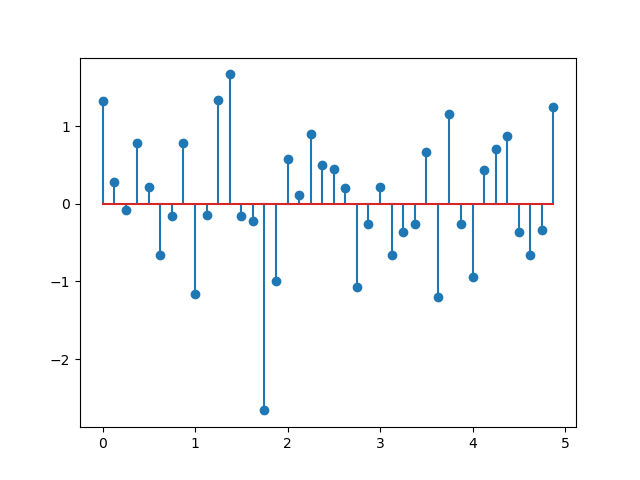

Medio: 0.04641797550175466
Máximo: 1.6690009353522892
Mínimo: -2.661585830590381
Amplitud: no se
Acción: 27.089447058306806
Energía: 29.138400380012353
Potencia media (valor cuadrático medio): 0.7284600095003089
Raíz del valor cuadrático medio 0.8534986874625577


In [6]:
# ALEATORIA

t, x = aleatoria(0, 1, 8, 0, 5)
plt.close('all')
plt.figure()
plt.stem(t,x)
plt.show()

print('Medio:', np.mean(x))
print('Máximo:', np.max(x))
print('Mínimo:',np.min(x))
print('Amplitud: no se')
print('Acción:', np.linalg.norm(x, 1))
energia = np.power(np.linalg.norm(x, 2),2)
print('Energía:', energia)
potencia = energia/len(x)
print('Potencia media (valor cuadrático medio):', potencia)
print('Raíz del valor cuadrático medio', np.sqrt(potencia))

### Ejercicio 2:
Compruebe que el producto interno mide el grado de parecido entre dos señales dadas. Para ello, genere dos señales senoidales y realice el producto interno entre ellas. Evalúe el efecto que producen los distintos parámetros (A, f, φ) sobre el cálculo del producto interno.

In [7]:
x1, t = senoidal(10, 1, 0, 0, 2, 4)
x2, t = senoidal(10, 2, 0, 0, 2, 4)

print('prod. interno:', np.dot(x1,x2))
print('norma 2', np.power(np.linalg.norm(x1,2),2))

prod. interno: 2.1316282072803006e-14
norma 2 160.00000000000006


Si las dos señales son iguales o una tiene más amplitud que la otra, el producto interno da positivo y alto. Que sean exactamente iguales significa que será igual a la norma 2 al cuadrado de una de ellas.

La fase afecta al producto interno

Cambiar la frecuencia es lo que afecta al parecido de las señales. En este caso cuando variamos la frecuencia las señales son muy distintas una de otra y el producto punto se acerca mucho a 0.


### Ejercicio 3:
Calcule el error cuadrático total de aproximación en el ejemplo con funciones de Legendre bajo las siguientes condiciones:
1. con los coeficientes calculados en el ejemplo,
2. con pequeñas variaciones en torno a estos coeficentes α, construyendo una gráfica en 3D con la variación en los coeficientes en x, y y el error cuadrático total en z, 
3. con más coeficientes α, para comprobar cómo se reduce el error cuadrático total al aumentar los coeficientes.

a1: 1.224744871391589  - a3: -0.46770717334674267
error cuadratico medio: 5.6952157287597585


Text(0.5, 0, 'z')

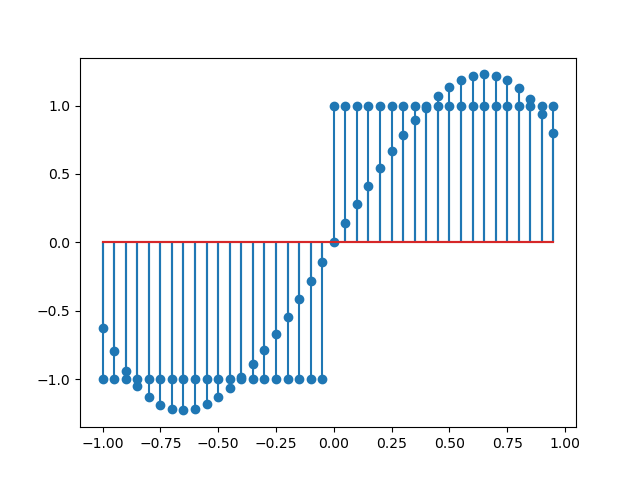

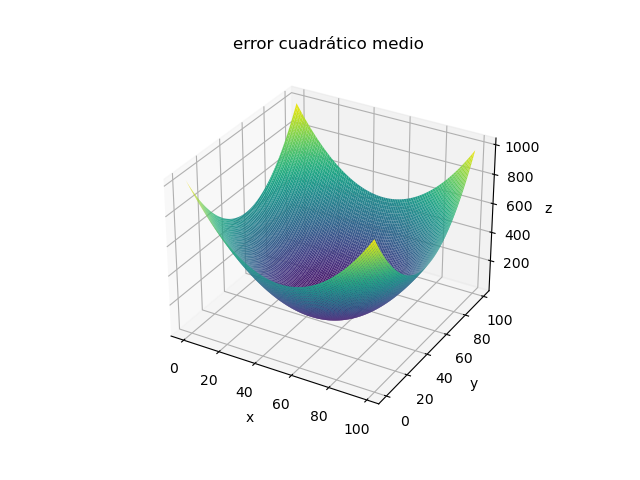

In [16]:
# Coeficientes de legendre
a_1 = np.sqrt(3/2)
a_3 = - np.sqrt(7/32)
print('a1:', a_1, ' - a3:', a_3)

# Funcion a aproximar
# T = 20 Hz
n = np.arange(-1,1,0.05)
x = np.zeros(len(n))
for i in range(len(n)):
    if(n[i]<-1e-5):
        x[i] = -1
    else:
        x[i] = 1

plt.close('all'); plt.stem(n,x)

# Funcion aproximada

y = a_1 * (np.sqrt(3/2)*n) + a_3 * (np.sqrt(7/2)*((5/2)*np.power(n,3)-(3/2)*n))
plt.stem(n,y)

# Error cuadrático total

e = np.power(np.linalg.norm(x-y,2),2)
print("error cuadratico total:",e)

a_1_v = np.arange(a_1-5,a_1+5,0.1)
a_3_v = np.arange(a_3-5,a_3+5,0.1)
matriz = np.zeros([len(a_1_v), len(a_3_v)])

for i in range(len(a_1_v)):
    for j in range(len(a_3_v)):
        y = a_1_v[i] * (np.sqrt(3/2)*n) + a_3_v[j] * (np.sqrt(7/2)*((5/2)*np.power(n,3)-(3/2)*n))
        e = np.power(np.linalg.norm(x-y,2),2)
        matriz[i,j] = e

X, Y = np.meshgrid(np.arange(0,len(a_1_v),1), np.arange(0,len(a_3_v),1))

def f(X,Y):
    return matriz[X,Y]
Z = f(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('error cuadrático medio')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


error cuadratico total: 5.694298538774363


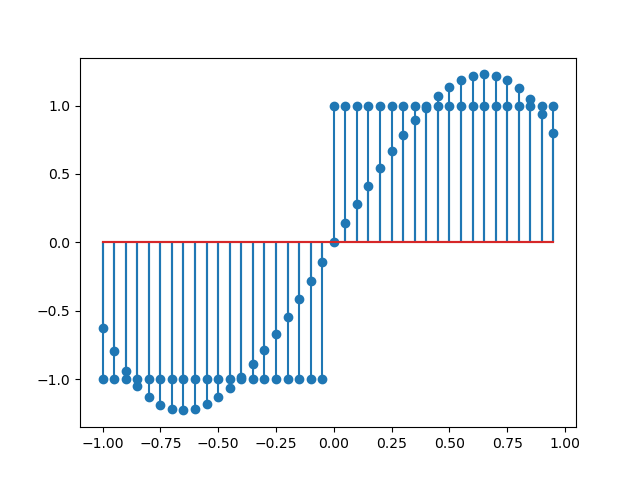

In [17]:
# PRUEBA con más coeficientes
x = np.zeros(len(n))
for i in range(len(n)):
    if(n[i]<-1e-5):
        x[i] = -1
    else:
        x[i] = 1

a_5 = np.sqrt(22)/16

y = a_1 * (np.sqrt(3/2)*n) + a_3 * (np.sqrt(7/2)*((5/2)*np.power(n,3)-(3/2)*n)) + a_5 * (np.sqrt(22)/61440*(63*np.power(n,5) - 70*np.power(n,3) + 15 * n))
plt.close('all')
plt.stem(n,x)
plt.stem(n,y)

# Error cuadrático total

e = np.power(np.linalg.norm(x-y,2),2)
print("error cuadratico total:",e)

### Ejercicio 4:
(∗) Genere una señal como combinación lineal del conjunto de señales
senoidales con frecuencias de 1, 2, 3, 4, 5, 6, 7, 8, 9 y 10 Hz y luego:
1. mida el grado de parecido con dichas senoidales representando el resultado en un gráfico de barras,

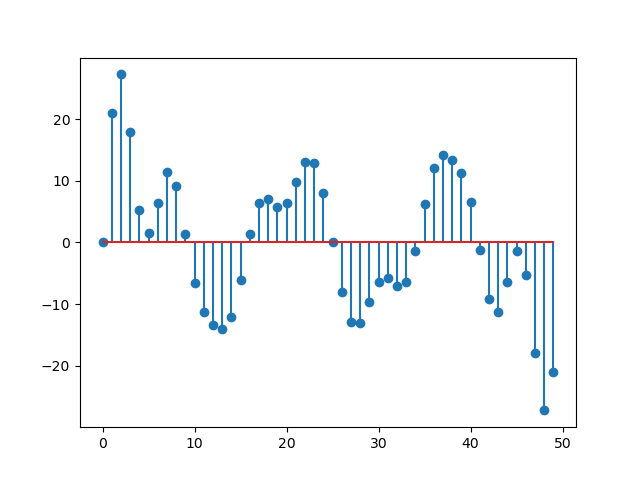

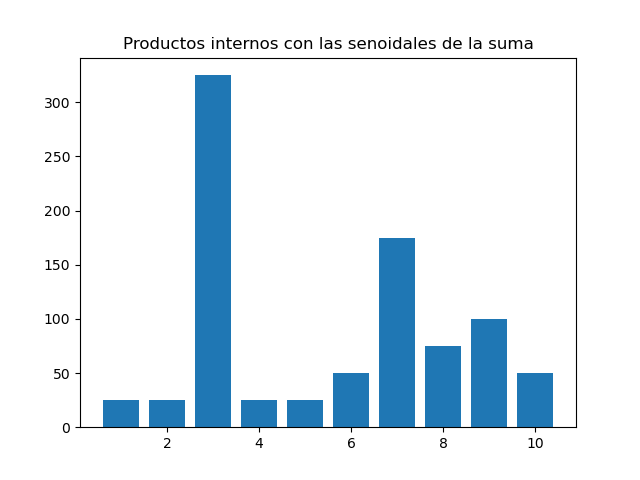

In [33]:
def senoidal(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.sin(2*math.pi*fs*t + phi) 
    return x, t

x_1, t = senoidal (50, 1, 0, 0, 1)
x_2, t = senoidal (50, 2, 0, 0, 1)
x_3, t = senoidal (50, 3, 0, 0, 1)
x_4, t = senoidal (50, 4, 0, 0, 1)
x_5, t = senoidal (50, 5, 0, 0, 1)
x_6, t = senoidal (50, 6, 0, 0, 1)
x_7, t = senoidal (50, 7, 0, 0, 1)
x_8, t = senoidal (50, 8, 0, 0, 1)
x_9, t = senoidal (50, 9, 0, 0, 1)
x_10, t = senoidal (50, 10, 0, 0, 1)

super_x = x_1 + x_2 + 13 * x_3 + x_4 + x_5 + 2 * x_6 + 7 * x_7 + 3 * x_8 + 4 * x_9 + 2 * x_10
plt.close('all')
plt.stem(super_x)
plt.show()

productos_internos = [np.dot(x_1,super_x), np.dot(x_2,super_x), np.dot(x_3,super_x), np.dot(x_4,super_x), np.dot(x_5,super_x), np.dot(x_6,super_x), np.dot(x_7,super_x), np.dot(x_8,super_x), np.dot(x_9,super_x), np.dot(x_10,super_x)]

plt.figure()
plt.bar(np.arange(1,11,1),productos_internos)
plt.title('Productos internos con las senoidales de la suma')
plt.show()

2. vuelva a medir el grado de parecido pero con una combinación lineal en
la que se varía la fase de las senoidales



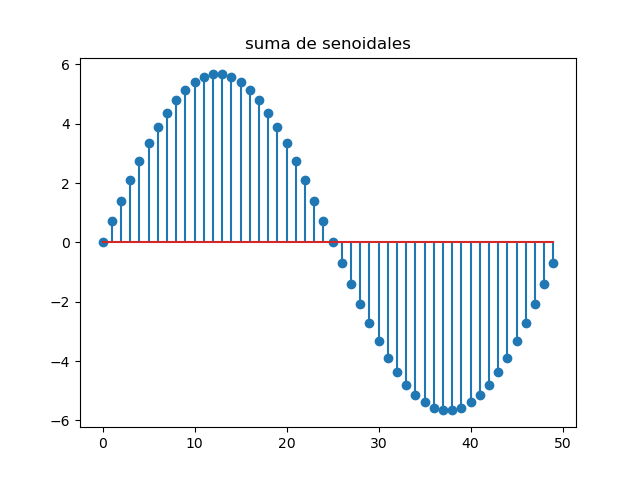

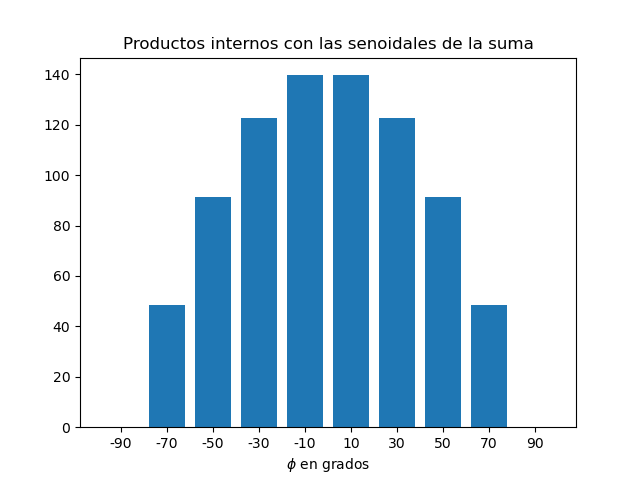

In [46]:
phi = np.linspace(-math.pi/2, math.pi/2, 10)

super_x = np.zeros((10, 50))
for i, p in enumerate(phi):
    x, t = senoidal (50, 1, p, 0, 1)
    super_x[i] = x

super_sin = super_x[0]*0
for i in range(10):
    super_sin += super_x[i]

plt.close('all')
plt.stem(super_sin); plt.title('suma de senoidales')
plt.show()

prod_internos = []
for x in super_x:
    prod_internos.append(np.dot(x, super_sin))

plt.figure()
names = [f'{(180/np.pi) *  p:.0f}' for p in phi]
plt.bar(names,prod_internos)
plt.title('Productos internos con las senoidales de la suma'); plt.xlabel('$\phi$ en grados')
plt.show()


3. realice el gráfico de barras para el caso de una señal cuadrada de 5,5 Hz.

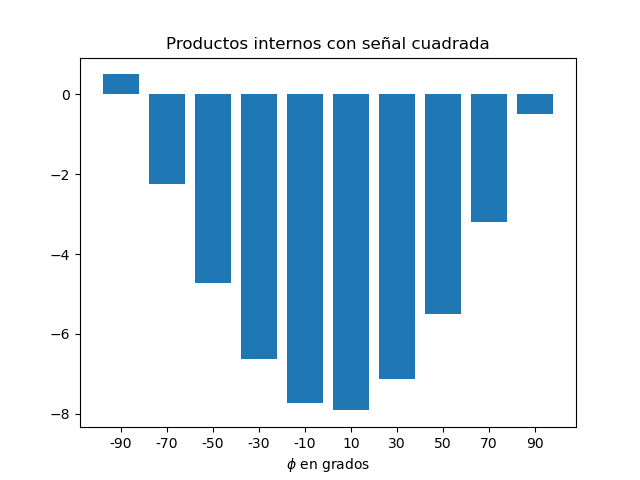

In [47]:
def cuadrada(fm, fs, phi, tini, tfin):
  Tm = 1/fm
  t = np.arange(tini, tfin, Tm)  
  cond = np.mod(2*math.pi*fs*t+phi, 2*math.pi)
  idx_noceros = np.where(cond>= math.pi)
  y = np.ones(len(t))
  y[idx_noceros] = -1
  return t, y

cuad, t = cuadrada(50, 5.5, 0, 0, 1)

prod_internos = []
for x in super_x:
    prod_internos.append(np.dot(x, cuad))

plt.figure()
names = [f'{(180/np.pi) *  p:.0f}' for p in phi]
plt.bar(names,prod_internos)
plt.title('Productos internos con señal cuadrada'); plt.xlabel('$\phi$ en grados')
plt.show()

### Ejercicio 5
En el archivo te.txt se encuentra la señal registrada al discar un número telefónico en una línea ruidosa y se requiere determinar el número que se ha discado. La señal se digitalizó con una frecuencia de muestreo de 11025 Hz y se sabe que cada número del teléfono está codificado mediante la suma de dos señales senoidales cuya frecuencia indica la posición en el teclado. De arriba hacia abajo las frecuencias son 697, 770, 852 y 941 Hz; de izquierda a derecha son 1209, 1336 y 1477 Hz. Por ejemplo: el número 2 se codifica con la suma de dos senos con frecuencias 697 y 1336 Hz; el número 7 se codifica con 852 y 1209 Hz. Se necesita determinar el número que se ha discado. (Sugerencia: utilice el producto interno)

Frecuencias según el número:

1 - 697 - 1209

2 - 697 - 1336

3 - 697 - 1477

4 - 770 - 1209

5 - 770 - 1336

6 - 770 - 1477

7 - 852 - 1209

8 - 852 - 1336

9 - 852 - 1477

0 - 941 - 1336

Números tecleados: 1 7 2 2 3 9 4

Respuesta: 2428265


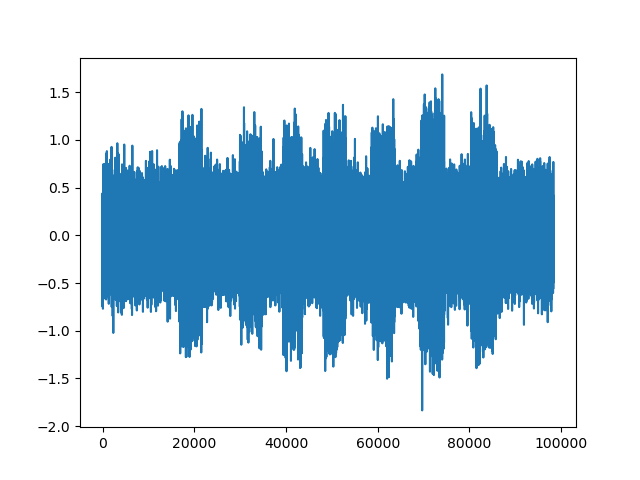

longitud: 98304


In [11]:
# genero las señales de cada número
data = np.loadtxt('datasets/te.txt')
plt.close('all')
plt.figure()
plt.plot(data)
plt.show()
print('longitud:',len(data))

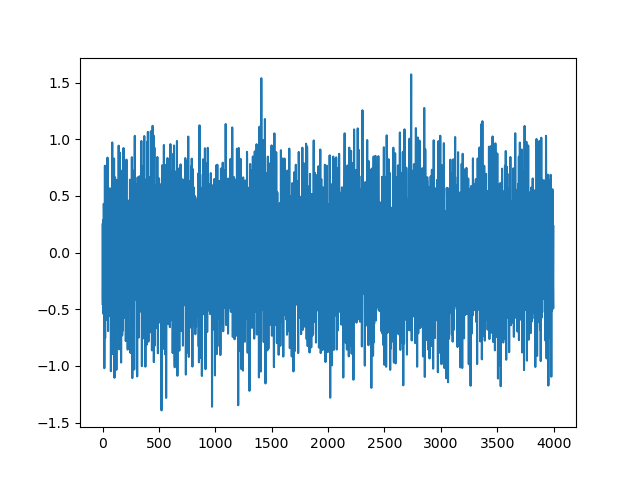

muestras pulso 1: 4000


TypeError: senoidal() takes 5 positional arguments but 6 were given

In [12]:
fm = 11025
pulso_1 = data[81000:85000]
plt.close('all')
plt.figure()
plt.plot(pulso_1)
plt.show()
print('muestras pulso 1:', len(pulso_1))
tfin = len(pulso_1)/fm

# FILAS
sen_697, t = senoidal(fm, 697, 0, 0, tfin, 1)
prod_internos = [[697], [0], [np.dot(sen_697, pulso_1)]]
for i in range(1,24):
    ang = math.pi*i/12
    sen_697, t = senoidal(fm, 697, ang, 0, tfin, 1)
    prod_internos[0].append(697);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_697))

sen_770, t = senoidal(fm, 770, 0, 0, tfin, 1)
prod_internos[0].append(770);  prod_internos[1].append(0)
prod_internos[2].append(np.dot(pulso_1,sen_770))
for i in range(1,24):
    ang = math.pi*i/12
    sen_770, t = senoidal(fm, 770, ang, 0, tfin, 1)
    prod_internos[0].append(770);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_770))

sen_852, t = senoidal(fm, 852, 0, 0, tfin, 1)
prod_internos[0].append(852);  prod_internos[1].append(0)
prod_internos[2].append(np.dot(pulso_1,sen_852))
for i in range(1,24):
    ang = math.pi*i/12
    sen_852, t = senoidal(fm, 852, ang, 0, tfin, 1)
    prod_internos[0].append(852);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_852))

sen_941, t = senoidal(fm, 941, 0, 0, tfin, 1)
prod_internos[0].append(941);  prod_internos[1].append(0)
prod_internos[2].append(np.dot(pulso_1,sen_941))
for i in range(1,24):
    ang = math.pi*i/12
    sen_941, t = senoidal(fm, 941, ang, 0, tfin, 1)
    prod_internos[0].append(941);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_941))

# print('prods FILA:', prod_internos)
max_prod_fila = np.max(prod_internos[2]); fase_fila = prod_internos[1][prod_internos[2].index(max_prod_fila)]
freq_fila = prod_internos[0][prod_internos[2].index(max_prod_fila)]
print('max. producto FILA:', max_prod_fila)
print('fase del max. producto FILA:', fase_fila)
print('frecuencia del max producto FILA:', freq_fila)

# COLUMNAS
prod_internos = 0
sen_1209, t = senoidal(fm, 1209, 0, 0, tfin, 1)
prod_internos = [[1209], [0], [np.dot(sen_1209, pulso_1)]]
for i in range(1,24):
    ang = math.pi*i/12
    sen_1209, t = senoidal(fm, 1209, ang, 0, tfin, 1)
    prod_internos[0].append(1209);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_1209))

sen_1336, t = senoidal(fm, 1336, 0, 0, tfin, 1)
prod_internos[0].append(1336);  prod_internos[1].append(0)
prod_internos[2].append(np.dot(pulso_1,sen_1336))
for i in range(1,24):
    ang = math.pi*i/12
    sen_1336, t = senoidal(fm, 1336, ang, 0, tfin, 1)
    prod_internos[0].append(1336);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_1336))
    
sen_1477, t = senoidal(fm, 1477, 0, 0, tfin, 1)
prod_internos[0].append(1477);  prod_internos[1].append(0)
prod_internos[2].append(np.dot(pulso_1,sen_1477))
for i in range(1,24):
    ang = math.pi*i/12
    sen_1477, t = senoidal(fm, 1477, ang, 0, tfin, 1)
    prod_internos[0].append(1477);  prod_internos[1].append(ang)
    prod_internos[2].append(np.dot(pulso_1,sen_1477))

# print('prods COL:', prod_internos)
max_prod_col = np.max(prod_internos[2]); fase_col = prod_internos[1][prod_internos[2].index(max_prod_col)]
freq_col = prod_internos[0][prod_internos[2].index(max_prod_col)]
print('max. producto COL:', max_prod_col)
print('fase del max. producto COL:', fase_col)
print('frecuencia del max producto COL:', freq_col)


# PRUEBA
sen_fila, t = senoidal(fm, freq_fila, fase_fila, 0, tfin, 1)
sen_col, t = senoidal(fm, freq_col, fase_col, 0, tfin, 1)
senoidal_pulso1 = sen_fila + sen_col
plt.close('all')
plt.figure()
plt.plot(senoidal_pulso1)
plt.show()

print('norma cuadrado pulso 1:',np.dot(pulso_1, pulso_1))
print('norma cuadrado senoidal:',np.dot(senoidal_pulso1, senoidal_pulso1))
print('producto punto',np.dot(pulso_1, senoidal_pulso1))



In [ ]:
print(98304/11025)

8.916462585034013
